In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [22]:
data = np.random.randn(100)
activated_data = sigmoid(data)

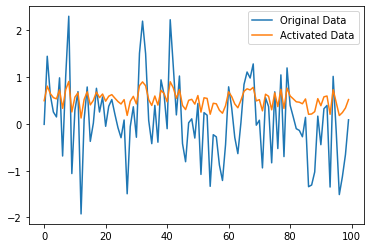

In [23]:
plt.plot(data, label='Original Data')
plt.plot(activated_data, label='Activated Data')
plt.legend()
plt.show()

In [24]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

In [25]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [26]:
# Normalize the input data
x_train = x_train / 255
x_test = x_test / 255

In [27]:
# Flatten the input data
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

In [28]:
# Define the model without activation function
model1 = Sequential([
    Dense(128, input_shape=(784,), activation=None),
    Dense(10, activation='softmax')
])

In [29]:
# Define the model with activation function
model2 = Sequential([
    Dense(128, input_shape=(784,), activation='sigmoid'),
    Dense(10, activation='softmax')
])

In [30]:
# Compile the models
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
# Train the models
history1 = model1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3590 - accuracy: 0.8987 - val_loss: 0.2928 - val_accuracy: 0.9188
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2987 - accuracy: 0.9168 - val_loss: 0.2861 - val_accuracy: 0.9223
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2890 - accuracy: 0.9194 - val_loss: 0.2939 - val_accuracy: 0.9212
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2813 - accuracy: 0.9218 - val_loss: 0.2885 - val_accuracy: 0.9223
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2766 - accuracy: 0.9222 - val_loss: 0.2886 - val_accuracy: 0.9198
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2735 - accuracy: 0.9234 - val_loss: 0.2792 - val_accuracy: 0.9219
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2704 - accuracy: 0.9238 - val_loss: 0.2839 - val_accuracy:

In [32]:
history2 = model2.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4046 - accuracy: 0.8937 - val_loss: 0.2221 - val_accuracy: 0.9353
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1955 - accuracy: 0.9443 - val_loss: 0.1628 - val_accuracy: 0.9525
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1426 - accuracy: 0.9591 - val_loss: 0.1276 - val_accuracy: 0.9630
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1103 - accuracy: 0.9680 - val_loss: 0.1122 - val_accuracy: 0.9662
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0883 - accuracy: 0.9750 - val_loss: 0.0961 - val_accuracy: 0.9700
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0720 - accuracy: 0.9797 - val_loss: 0.0867 - val_accuracy: 0.9738
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0598 - accuracy: 0.9834 - val_loss: 0.0799 - val_accuracy:

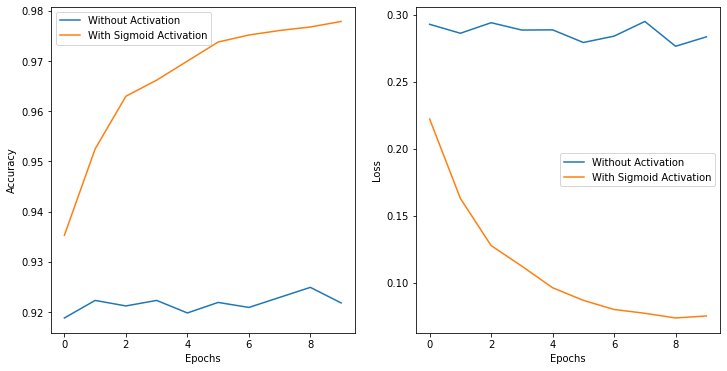

In [33]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the validation accuracy
axs[0].plot(history1.history['val_accuracy'], label='Without Activation')
axs[0].plot(history2.history['val_accuracy'], label='With Sigmoid Activation')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot the validation loss
axs[1].plot(history1.history['val_loss'], label='Without Activation')
axs[1].plot(history2.history['val_loss'], label='With Sigmoid Activation')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

# Show the plot
plt.show()